# Project: Sharks Attack

In [24]:
!pip install xlrd #!pip install country_converter, keep this here pls

### Visualisation of the Dataset
Before starting my analysis, I first visualise the cleaned dataset to understand its structure and key patterns. To do this, I load the necessary libraries and import the cleaned dataset, which I previously processed in the data-clean notebook. This step ensures that I work with a structured and refined dataset for accurate analysis.

### Importing Libraries 

In [25]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display 
from PIL import Image
warnings.filterwarnings('ignore')

### Loading the Excel Data

In [26]:
# #define path to xls
# url = 'https://www.sharkattackfile.net/spreadsheets/GSAF5.xls'
# df = pd.read_excel(url)
df = pd.read_pickle("cleaned_data.pkl") 

In [27]:
# Check-ups 
# print(df.shape)  # Checkung number of rows and columns
# print(df.columns)  # Listing all column names
# print(df.isnull().sum())  # Checking any missing values

## Shark Attacks Over the Years

There is a noticeable spike in reported shark attacks around the year 1960. Apart from this spike, the overall trend shows an increase in the number of reported shark-related incidents over time.
Most of the recorded incidents come from the 19th, 20th, and 21st centuries, with 528 reports from the 19th century, 3,341 from the 20th century, and 1,878 from the 21st century (up to 2018). This increase is likely due to improved data collection and reporting methods over time.To ensure I am working with more reliable and complete information, I have to focus on the data from the 19th to 21st centuries.

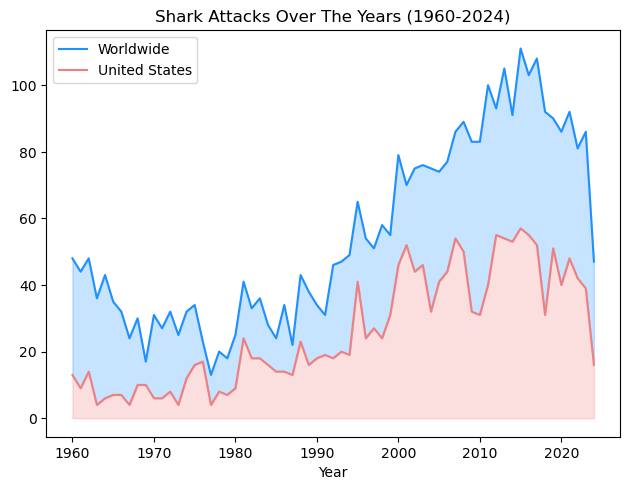

In [28]:
# image_path = "images/AttacksByYearSince1750.png"
# image = Image.open(image_path)
# display(image)

image_path = "images/AttacksByYear.png"
image = Image.open(image_path)
display(image)

In [29]:
df["Type"].value_counts()

Type
Unprovoked    3578
Name: count, dtype: int64

From the recorded shark attacks, 3,578 were classified as unprovoked incidents.

### Shark Species Involved in Attacks
- Most cases (2,580) are classified as "Other/Unknown", meaning the species was not identified.
- Among identified species:
 - White Shark (348 attacks) is the most reported.
 - Tiger Shark (204 attacks) and Bull Shark (160 attacks) follow.
 - Blacktip Shark (86 attacks) and Reef Shark (29 attacks) have fewer incidents.
- Other species with recorded attacks include Grey Shark (28), Whitetip Shark (27), Lemon Shark (23), Nurse Shark (23), Spinner Shark (20), Mako Shark (19), Hammerhead Shark (17), Sandtiger Shark (13).
- Whale Shark (1 case) is likely a misclassification or a non-aggressive interaction.
The data suggests that certain species, particularly White, Tiger, and Bull Sharks, are more frequently involved in attacks, while many cases remain unidentified due to limited evidence.

In [30]:
print(df["Species_Types"].value_counts())  # Check unique values

Species_Types
Other/Unknown       2580
White Shark          348
Tiger Shark          204
Bull Shark           160
Blacktip Shark        86
Reef Shark            29
Grey Shark            28
Whitetip Shark        27
Lemon Shark           23
Nurse Shark           23
Spinner Shark         20
Mako Shark            19
Hammerhead Shark      17
Sandtiger Shark       13
Whale Shark            1
Name: count, dtype: int64


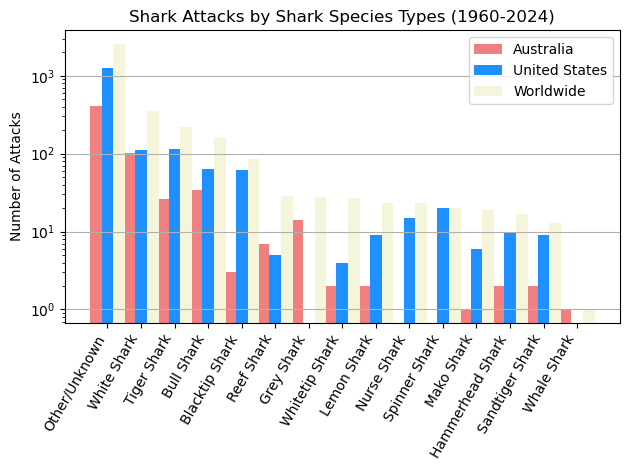

In [51]:
df = pd.read_pickle("shark-attack/cleaned_data.pkl")
image_path = "images/AttacksBySpecies.png"
image = Image.open(image_path)
display(image)

### Shark Attack Incidents 
-The dataset records shark attack incidents across the World.
- Most cases (2,580) fall under "Other/Unknown", highlighting difficulties in species identification.
- Among identified species:
    - White Sharks (348 attacks) are the most frequently reported, with 110 in the United States and 103 in Australia.
    - Tiger Sharks (217 attacks) and Bull Sharks (160 attacks) are also significant contributors.
    - Less common species, such as the Blacktip Shark, Reef Shark, and Hammerhead Shark, have fewer reported attacks.
    - The Whale Shark, a non-aggressive species, has only one recorded case.
- The data suggests that some species have more human interactions, while many cases remain unidentified due to limited evidence.

In [55]:
df_shark_counts = pd.read_csv("shark-attack/shark_species_counts.csv") # To Showcase the Shark Species
print(df_shark_counts)

       Shark Species  Worldwide   USA  Australia
0      Other/Unknown       2580  1265        413
1        White Shark        348   110        103
2        Tiger Shark        217   114         26
3         Bull Shark        160    64         34
4     Blacktip Shark         86    61          3
5         Reef Shark         29     5          7
6         Grey Shark         28     0         14
7     Whitetip Shark         27     4          2
8        Lemon Shark         23     9          2
9        Nurse Shark         23    15          0
10     Spinner Shark         20    20          0
11        Mako Shark         19     6          1
12  Hammerhead Shark         17    10          2
13   Sandtiger Shark         13     9          2
14       Whale Shark          1     0          1


### Top 10 Shark Attacks by Country

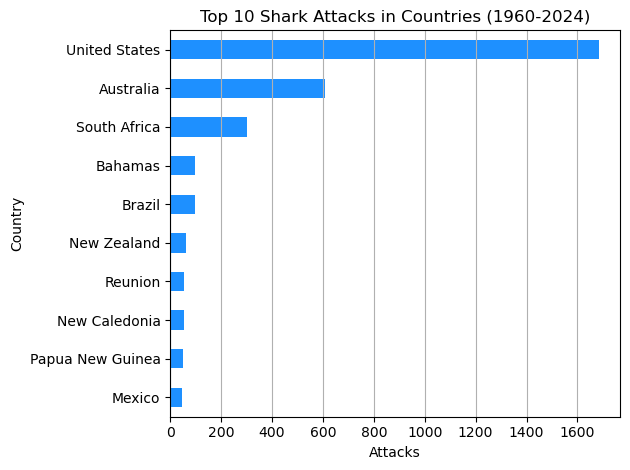

In [32]:
image_path = "images/AttacksByCountry.png"
image = Image.open(image_path)
display(image)

In [56]:
country_group = df.groupby('Country')
number_of_attacks = country_group['Country'].count()
number_of_attacks = number_of_attacks.sort_values(ascending=False)
top_10_attacks = number_of_attacks.head(10)
top_10_attacks

Country
United States       1683
Australia            608
South Africa         303
Bahamas               97
Brazil                97
New Zealand           61
Reunion               55
New Caledonia         53
Papua New Guinea      49
Mexico                48
Name: Country, dtype: int64

The United States (1,683 cases) and Australia (608 cases) have the highest recorded shark attacks, making up the majority of incidents. South Africa (303 cases) follows, while other countries like Brazil, the Bahamas, and New Zealand report significantly fewer cases.

### Top 10 Shark Attacks by State (USA)
Florida (908 cases) has the highest number of recorded shark attacks, followed by Hawaii (226), New South Wales (200), California (183), and Western Australia (140).

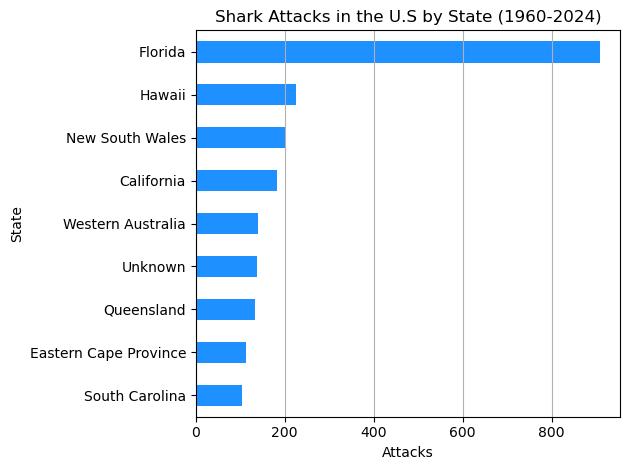

In [57]:
image_path = "images/AttacksByState.png"
image = Image.open(image_path)
display(image)

### Shark Attacks by Location
New Smyrna Beach, Volusia County (182 cases) is the most shark-prone location, often referred to as the "Shark Bite Capital of the World." Other high-risk areas include Daytona Beach (32), Ponce Inlet (25), and Melbourne Beach (20), all within Florida's Volusia and Brevard counties. Locations like Myrtle Beach (19) and Boa Viagem, Recife (14) also report notable shark activity.

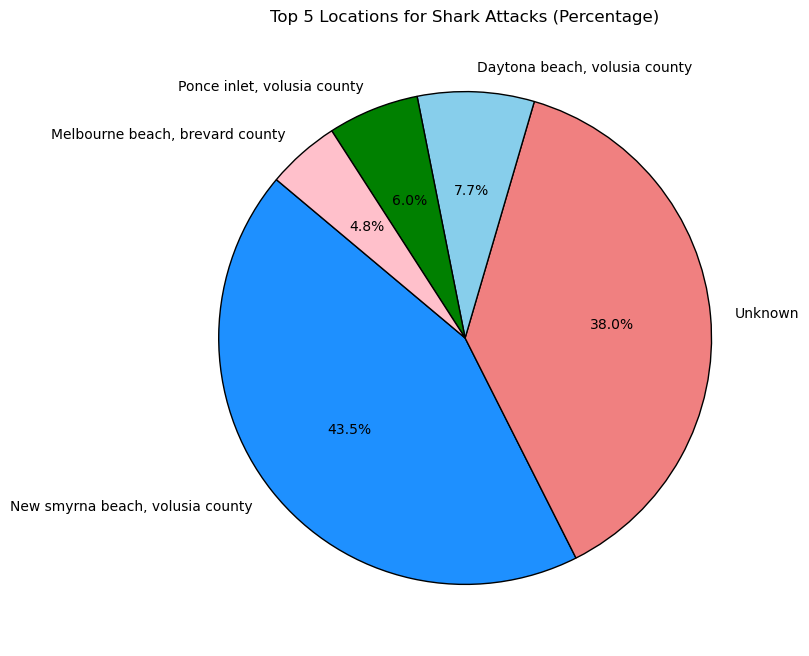

In [35]:
image_path = "images/Top5LocationsSharks.png"
image = Image.open(image_path)
display(image)

### Shark Attacks by Activity
The majority of shark attacks occurred while victims were engaged in water sports and recreational activities.
 - Surfing (1,150 cases) had the highest number of incidents, likely due to the time surfers spend in shark-populated waters.
 - Swimming (631 cases) and Spearfishing (307 cases) were also high-risk activities.
 - Other notable activities include Wading (145), Diving (132), Snorkeling (126), and Fishing (116).
 - Less frequent incidents were reported among Boogie Boarders (53), Windsurfers (22), Kayakers (10), and Jet Skiers (2).
This distribution suggests that surface water activities, particularly surfing and swimming, carry the highest risk of shark encounters.

In [36]:
print(df["Cleaned_Activity"].value_counts())

Cleaned_Activity
Surfing                1150
Swimming                631
Other/Unknown           618
Spearfishing            307
Wading                  145
Diving                  132
Snorkeling              126
Fishing                 116
Scuba Diving             95
Free Diving              64
Boogie Boarding          53
Floating                 27
Windsurfing              22
Kite Surfing             18
Paddle                   16
Bathing                  14
Activity with Shark      13
Paddleboarding           12
Kayaking                 10
Canoeing                  3
Jet Skiing                2
Sailing                   2
Bodyboarding              1
Wakeboarding              1
Name: count, dtype: int64


### Gender Distribution Among Injured Victims
- Males are the most affected, likely due to higher participation in surfing, diving, and spearfishing.
- Females are less frequently injured, mainly during swimming and snorkeling.
- Some cases remain unclassified ("Unknown") due to missing data.
- The higher male injury rate suggests greater exposure to shark-prone activities.

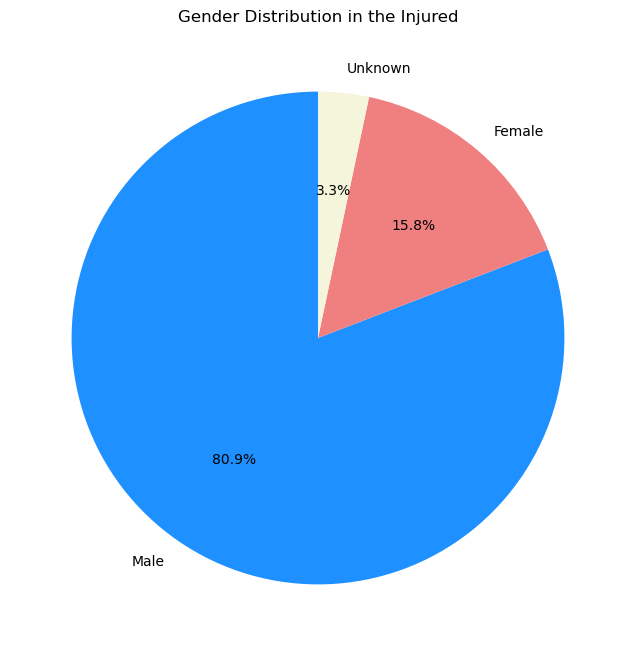

In [37]:
image_path = "images/GenderDistributionIntheInjured.png"
image = Image.open(image_path)
display(image)

### Shark Attacks by Gender and Activity
- Males account for the majority of attacks across all activities, particularly in surfing (1,046 cases), spearfishing (287 cases), and swimming (449 cases).
- Females are most frequently attacked while swimming (170 cases) and snorkeling (58 cases), though their overall numbers remain lower.
- Diving-related activities (scuba diving, free diving, and general diving) also show a higher proportion of male victims.
- A significant number of cases (unknown gender) exist, especially in other/unknown activities (49 cases).
- The data suggests that males are more exposed to shark encounters, likely due to higher participation in high-risk activities like surfing, spearfishing, and deep diving.

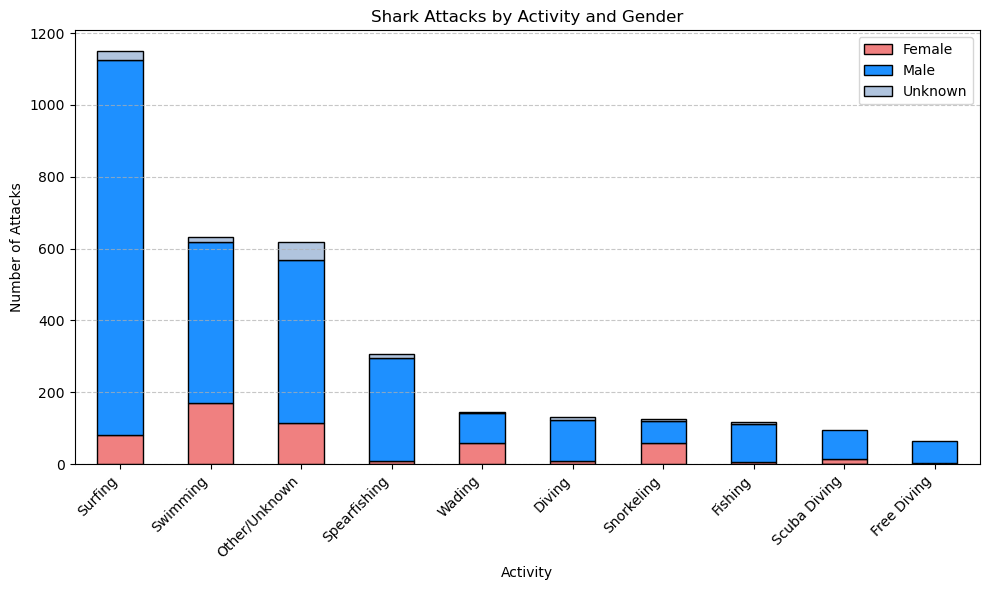

In [38]:
image_path = "images/SharkAttackByActivity&Gender.png"
image = Image.open(image_path)
display(image)

### Fatal Shark Attacks by Gender
- Males have the highest fatalities, likely due to greater exposure to high-risk activities.
- Female fatalities are significantly lower.
- Some cases remain unclassified ("Unknown") due to missing data.

### Shark Attacks by Decade
Grouping shark attack data by decade removes yearly noise, revealing real trends without distortion from random spikes. It improves reliability, smoothing out inconsistencies in older records while providing a clearer view of long-term patterns.

This approach also connects trends to climate, tourism, and ocean activity, which aren’t evident in annual data. By eliminating short-term distractions, it ensures a stable, accurate, and meaningful analysis.

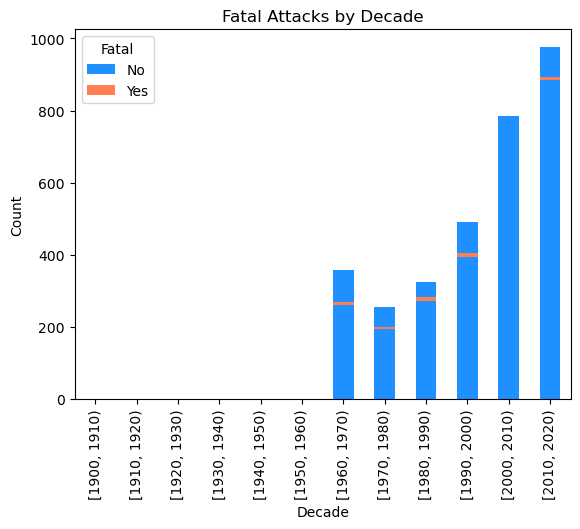

In [39]:
image_path = "images/FatalAttacksbyDecade.png"
image = Image.open(image_path)
display(image)

### Shark Attacks by Age
- Males (2,214 cases) had a median age of 25 years, with most victims between 18 and 37 years old. The youngest was 1 year old, and the oldest was 87.
- Females (452 cases) had a slightly lower median age of 22 years, with the majority falling between 14 and 40 years old. The youngest was 3 years old, and the oldest was 77.
- Unknown gender cases (22 cases) had a median age of 18.5 years, with ages ranging from 9 to 57 years.
- The data suggests that younger individuals, particularly those in their late teens to mid-thirties, are the most frequent victims of shark attacks, likely due to their higher participation in water activities.

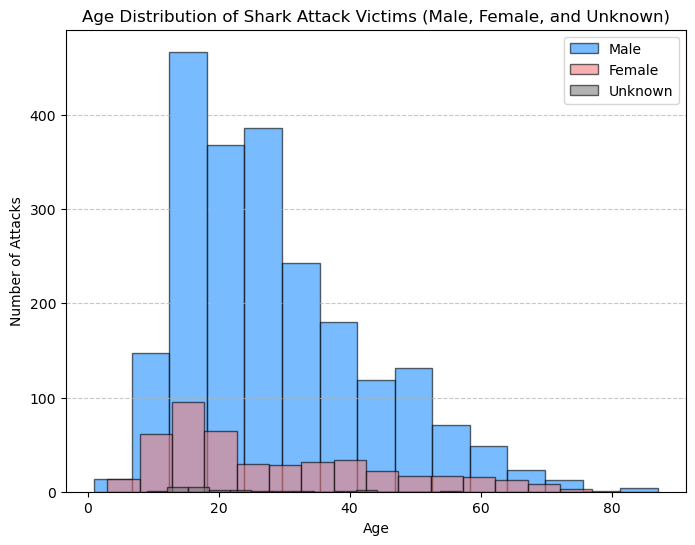

In [58]:
image_path = "images/AgeDistribution.png"
image = Image.open(image_path)
display(image)

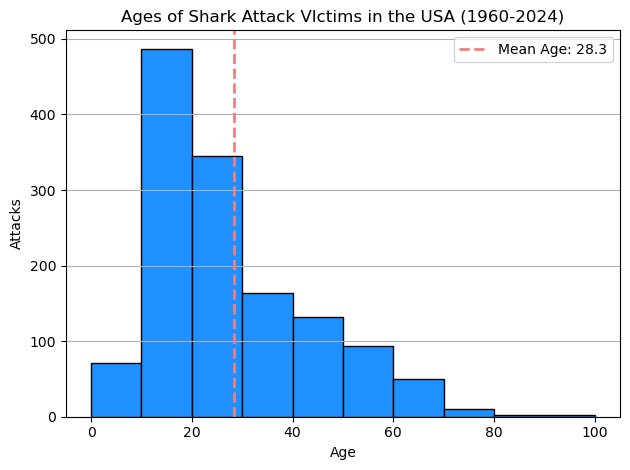

In [61]:
image_path = "images/AttacksByAge.png"
image = Image.open(image_path)
display(image)

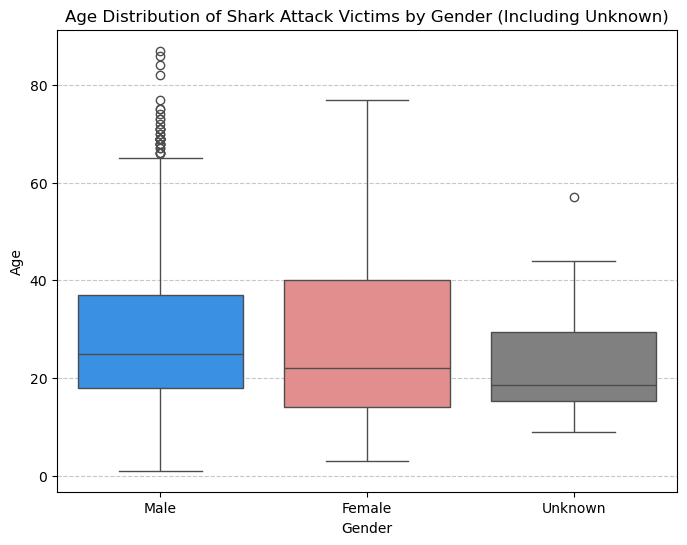

In [41]:
image_path = "images/AgeDistributionOfSharkAttackVictims.png"
image = Image.open(image_path)
display(image)

### Shark Attacks by Time of Day
- Most attacks (1,453 cases) have an unknown time, highlighting gaps in reporting.
- Afternoon (659) and Midday (591) are the most dangerous periods, likely due to peak human activity in the water.
- Morning (391) and Dusk (277) also show significant attack numbers.
- Dawn (117) and Night (90) have the fewest recorded incidents, possibly due to fewer people in the water.

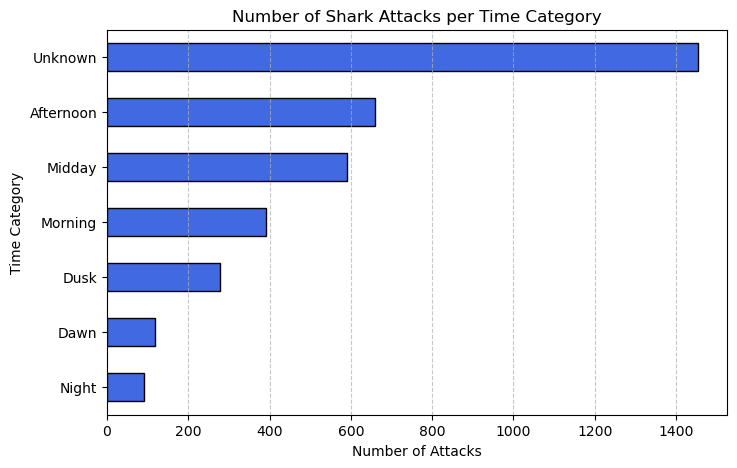

In [42]:
image_path = "images/NumberOfSharksPerTimeCategory.png"
image = Image.open(image_path)
display(image)

### Conclusion:
Certain regions, particularly Florida (USA), New South Wales (Australia), and South Africa, show a higher concentration of shark attacks. This supports the hypothesis that environmental factors (such as warm coastal waters, high marine biodiversity, and popular surf spots) contribute to increased shark activity. Additionally, improved reporting and human presence in the water influence the numbers.

### Summary of Shark Attack Analysis
This analysis explores shark attack patterns, considering locations, time of day, victim demographics, and activity types to identify key risk factors.
- Most attacks occur in the USA (1,683 cases), followed by Australia and South Africa, likely due to higher coastal activity and larger populations of both sharks and water users.
- Surfing (1,150 cases) and swimming (631 cases) are the most common activities during attacks, as they involve extended time in the water and movement patterns that may attract sharks.
- Males are disproportionately affected, particularly in high-risk activities like surfing and diving, leading to a higher fatality rate compared to females.
- Most attacks happen in the afternoon and midday, aligning with peak water activity and shark feeding behaviour.
- White Sharks, Tiger Sharks, and Bull Sharks account for most fatal attacks, reinforcing their reputation as the species most involved in serious incidents.
The findings suggest that shark attacks are strongly linked to human behaviour and environmental conditions. Understanding these patterns can help inform safer practices, better warning systems, and risk-reduction strategies in high-incident areas.